<a href="https://colab.research.google.com/github/Hritik8005/Dog-vs-Cat-Image-Classification/blob/main/Cat_vs_Dog_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries to import
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import os
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input,InceptionV3
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators reading train & validation data
train_ds = keras.utils.image_dataset_from_directory(
            directory = r"/content/drive/MyDrive/dogs_vs_cats/train",
            labels = "inferred",
            label_mode ="int",
            batch_size = 32,
            image_size=(256,256))
validation_ds = keras.utils.image_dataset_from_directory(
            directory = r"/content/drive/MyDrive/dogs_vs_cats/test",
            labels = "inferred",
            label_mode ="int",
            batch_size = 32,
            image_size=(256,256))

Found 2548 files belonging to 2 classes.
Found 1056 files belonging to 2 classes.


In [ ]:
# types of classes present
class_name = train_ds.class_names
class_name

['cats', 'dogs']

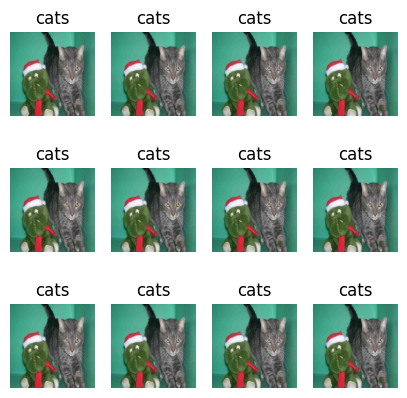

In [ ]:
# plotting the images
plt.figure(figsize=(5,5))
for image_batch,label_batch in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype('uint8'))
        plt.title(class_name[label_batch[0]])
        plt.axis("off")

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
# compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Fit the model
history = model.fit(train_ds,epochs=25,validation_data=validation_ds)

Epoch 1/25
80/80 [==============================] - 443s 5s/step - loss: 1.4985 - accuracy: 0.5651 - val_loss: 0.7238 - val_accuracy: 0.5180
Epoch 2/25
80/80 [==============================] - 12s 143ms/step - loss: 0.8122 - accuracy: 0.6056 - val_loss: 0.7171 - val_accuracy: 0.5653
Epoch 3/25
80/80 [==============================] - 11s 137ms/step - loss: 0.6773 - accuracy: 0.6330 - val_loss: 0.6900 - val_accuracy: 0.5616
Epoch 4/25
80/80 [==============================] - 12s 139ms/step - loss: 0.5925 - accuracy: 0.6943 - val_loss: 0.7046 - val_accuracy: 0.6098
Epoch 5/25
80/80 [==============================] - 12s 139ms/step - loss: 0.5519 - accuracy: 0.7245 - val_loss: 0.6124 - val_accuracy: 0.6600
Epoch 6/25
80/80 [==============================] - 13s 162ms/step - loss: 0.5128 - accuracy: 0.7488 - val_loss: 0.5277 - val_accuracy: 0.7225
Epoch 7/25
80/80 [==============================] - 11s 133ms/step - loss: 0.4582 - accuracy: 0.7818 - val_loss: 0.4778 - val_accuracy: 0.7453
E

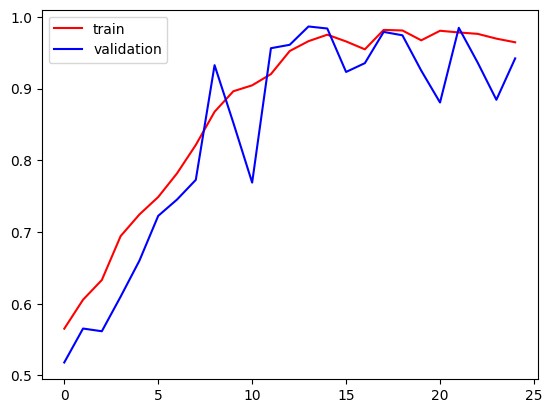

In [ ]:
# visualizing the train and validation accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

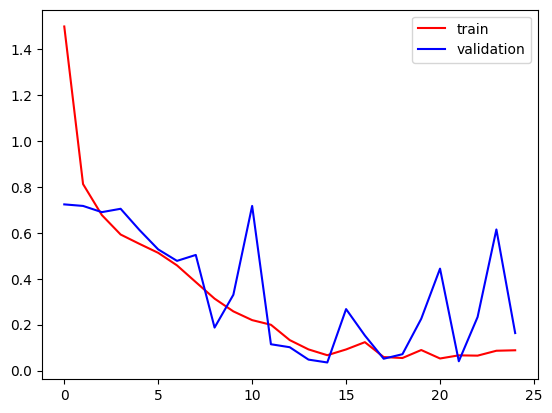

In [ ]:
# visualizing the losses
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow.keras.preprocessing import image

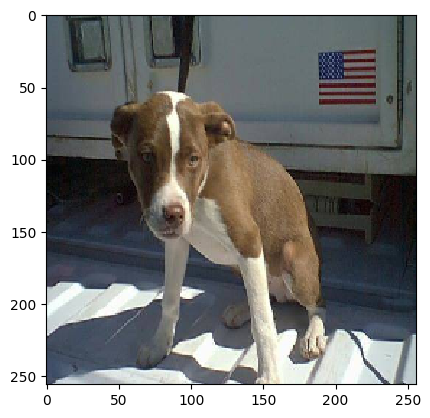

1/1 [==============================] - 0s 19ms/step
The given image is dog


In [ ]:
# Prediction on test data
path =r'/content/drive/MyDrive/dogs_vs_cats/test/dogs/dog.10027.jpg'
img = image.load_img(path,target_size=(256,256))
plt.imshow(img,interpolation='nearest')
plt.show()

img_array = np.array(img)
img_array.shape

img_array=img_array.reshape(1,256,256,3)

a = model.predict(img_array)
if a==[[0]]:
    print('The given image is cat')
else:
    print('The given image is dog')

In [ ]:
# EXTRA

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Datasets/test/cats/cat.4017.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

In [ ]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")